<span style="font-size:large;">
<div style="text-align: right">IM-UH 1511 <b>Introduction to Digital Humanities</b><br/>
Student name: <span style="color:blue"><b>X XX</b></span><br/>
Grade: <span style="color:red"><b></b></span><br/><br/></div>

## <span style="color:red">HOMEWORK 4</span>
# <span style="color:green">Wikipedia Networks and Topic Modeling

In [1]:
import urllib, os, codecs, random, operator, re, string, copy, dateutil.parser, itertools, pickle, datetime, math, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, networkx as nx
import wikipedia
import wikipediaapi
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
from collections import Counter
from string import punctuation, digits
import pathlib
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_lg')
import inflect
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
stemmer = PorterStemmer()

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora, models
from gensim.corpora import Dictionary
import pyLDAvis
from pyLDAvis import gensim as pgensim
pyLDAvis.enable_notebook()

def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.simplefilter('ignore')

### Random Selection of a Wikipedia Page

In [2]:
excluded=['International Standard Book Number',
          'International Standard Serial Number',
          'JSTOR',
          'Library of Congress Control Number',
          "Digital object identifier", 
          "Integrated Authority File", 
          "PubMed Identifier", 
          "PubMed Central",
          "OCLC",
          "Wayback Machine",
          "ArXiv",
          "Bibcode",
          "ACM Computing Classification System",
          "Academic Press",
          "Website",
          "World Wide Web",
          "BioRxiv",
          "CiteSeerX",
          "Telecommunication network",
          "Web sites",
          "Daylight saving time",
          "International Standard Name Identifier",
          "Système universitaire de documentation",
          "Virtual International Authority File",
          "WorldCat Identities",
          "Copyrighted",
          "Trademarked",
          "Bibliothèque nationale de France",
          "YouTube",
          "IMDb",
          "Personal name",
          "Wikidata",
          "SNAC",
          "Table of contents",
          "DVD-Video",
          "End user",
          "Album",
          "AllMusic",
          "Discogs",
          "Music genre",
          "Record label",
          "Record producer",
          "Integrated Taxonomic Information System",
          "ABC-CLIO",
          "Dictionary of National Biography",
          "Table of contents",
          "Video",
          "Geographic coordinate system",
          "Resource Description Framework",
          "Metadata",
          "Wikimedia Commons",
          "Wikimedia Foundation",
          "Google",
          'Electronic publication'
            ]

In [3]:
n=10  # minimum number of hyperlinks of the selected wikipedia page
N=21  # maximum number of hyperlinks of the selected wikipedia page

while True:
    try:
        page=wikipedia.page(wikipedia.random())
        hl=[w for w in page.links if w not in excluded]
        hl=[w.replace(" ","_") for w in hl]
    except wikipedia.DisambiguationError as e:
        pass
    except wikipedia.exceptions.PageError as e:
        pass
    if len(hl)>n and len(hl)<N:
        break

page_title=page.title
p=sorted(hl)

print("The %i hyperlinks from the (randomly) selected '%s' Wikipedia page are: \n" %(len(p),page_title))
for i in range(len(p)):
    print("%i. %s" %(i+1,p[i]))

The 16 hyperlinks from the (randomly) selected 'Serikbolsyn Abdildin' Wikipedia page are: 

1. 1999_Kazakh_legislative_election
2. 1999_Kazakh_presidential_election
3. Alma-Ata
4. Almaty
5. Communist_Party_of_Kazakhstan
6. GND_(identifier)
7. Kazakh_SSR
8. Kazakh_language
9. Kazakhstan
10. Mazhilis
11. Nursultan_Nazarbayev
12. Semipalatinsk_Oblast,_Kazakhstan
13. Soviet_Union
14. Supreme_Council_(Kazakhstan)
15. VIAF_(identifier)
16. Yerik_Asanbayev


In [4]:
# # Saving the random sample of hyperlinks

ft = "Wikipedia_page.txt"
f = open(ft,"w") 
f.write(page_title) 
f.close()

ff = "hyperlinks_"+page_title+".pkl"
with open(ff, 'wb') as f:
    pickle.dump(p, f)

In [5]:
# # Reading the saved random sample of hyperlinks

# ft = "Wikipedia_page.txt"
# f = open(ft,"r+")
# page_title = f.read()

# ff = "hyperlinks_"+page_title+".pkl"
# with open(ff, 'rb') as f:
#     p = pickle.load(f)

# print("The %i hyperlinks from the (randomly) selected '%s' Wikipedia page are: \n" %(len(p),page_title))
# for i in range(len(p)):
#     print("%i. %s" %(i+1,p[i]))

In [6]:
# # IF ONE WANTS TO USE A PREDEFINED WEBPAGE, 
# # one should uncomment and run the following lines
# # Here, I've considered as predefined Wikipedia page the page of the
# # 'United_States_women%27s_national_soccer_team' but you may take
# # instead anything you like. Notice, that subsequently I am filtering
# # a random sample of 20 hyperlinks. This might need to change if the
# # page you have selected has fewer hyperlinks.

# # page=wikipedia.page('United_States_women%27s_national_soccer_team') #'https://en.wikipedia.org/wiki/United_States_women%27s_national_soccer_team'
# # https://en.wikipedia.org/wiki/Los_Angeles_Lakers

# page=wikipedia.page('Digital_humanities') #Interactive_media')  # Los_Angeles_Lakers')
# # 'Digital_humanities' ---> 'New_York_University_Abu_Dhabi'
# page_title1=page.title

# print("The Wikipedia page '%s' has totally %i hyperlinks: \n" %(page_title1,len(page.links)))

# number_of_hyperlinks = 20
# p1=random.sample(sorted([w.replace(" ","_") for w in page.links if w not in excluded]),number_of_hyperlinks)

# print("The %i randomly selected hyperlinks from the Wikipedia page '%s' are:" %(len(p1),page_title1))
# for i in range(len(p1)):
#     print("%i. %s" %(i+1,p1[i]))

In [7]:
# # Saving the random sample of hyperlinks

# ft = "Wikipedia_page1.txt"
# f = open(ft,"w") 
# f.write(page_title1) 
# f.close()

# ff = "hyperlinks_"+page_title1+".pkl"
# with open(ff, 'wb') as f:
#     pickle.dump(p1, f)

In [8]:
# Reading the saved random sample of hyperlinks

ft = "Wikipedia_page1.txt"
f = open(ft,"r+")
page_title = f.read()

ff = "hyperlinks_"+page_title+".pkl"
with open(ff, 'rb') as f:
    p1 = pickle.load(f)

print("The %i hyperlinks from the (randomly) selected '%s' Wikipedia page are: \n" %(len(p1),page_title))
for i in range(len(p1)):
    print("%i. %s" %(i+1,p1[i]))

The 20 hyperlinks from the (randomly) selected 'Tuberaspis' Wikipedia page are: 

1. Cyborg_anthropology
2. Virtual_reality
3. Internet
4. JSON-LD
5. Voyant_Tools
6. SAWSDL
7. Readability
8. Religious_studies
9. Electronic_publication
10. Electronic_literature
11. Library_2.0
12. Dublin_Core
13. Semantic_Web_Rule_Language
14. Semantic_computing
15. Neologism
16. Digitization
17. HProduct
18. SciCrunch
19. Communication_studies
20. Extensible_Markup_Language


### Wikipedia Network

In [9]:
eds=[]
s=0
for pp in p1:
    try:
        ppp=sorted([w.replace(" ","_") for w in wikipedia.page(pp).links])
    except wikipedia.exceptions.PageError as e:
        pass
    except wikipedia.exceptions.DisambiguationError as e:
        pass
    ppp=[x for x in ppp if x!=pp]
    ih=set(ppp).intersection(set(p1))
#     if len(ih)>0:
    s+=1
    print("%i. %s has %i hyperlinks to webpages: \n %s" %(s,pp,len(ih),", ".join(list(ih))))
    print(" ")
    for q in ih:
        eds.append((pp,q))

1. Cyborg_anthropology has 0 hyperlinks to webpages: 
 
 
2. Virtual_reality has 0 hyperlinks to webpages: 
 
 
3. Internet has 8 hyperlinks to webpages: 
 SciCrunch, HProduct, Dublin_Core, Library_2.0, Semantic_Web_Rule_Language, SAWSDL, JSON-LD, Semantic_computing
 
4. JSON-LD has 8 hyperlinks to webpages: 
 SciCrunch, HProduct, Dublin_Core, Library_2.0, Semantic_Web_Rule_Language, Internet, SAWSDL, Semantic_computing
 
5. Voyant_Tools has 0 hyperlinks to webpages: 
 
 
6. SAWSDL has 8 hyperlinks to webpages: 
 SciCrunch, HProduct, Dublin_Core, Library_2.0, Semantic_Web_Rule_Language, Internet, JSON-LD, Semantic_computing
 
7. Readability has 0 hyperlinks to webpages: 
 
 
8. Religious_studies has 0 hyperlinks to webpages: 
 
 
9. Electronic_publication has 0 hyperlinks to webpages: 
 
 
10. Electronic_literature has 1 hyperlinks to webpages: 
 Digitization
 
11. Library_2.0 has 8 hyperlinks to webpages: 
 SciCrunch, HProduct, Dublin_Core, Semantic_Web_Rule_Language, Internet, SAWSDL

The randomly sampled Wikipedia graph of 'Tuberaspis' has 14 nodes (pages) and 84 edges (hyperlinks)


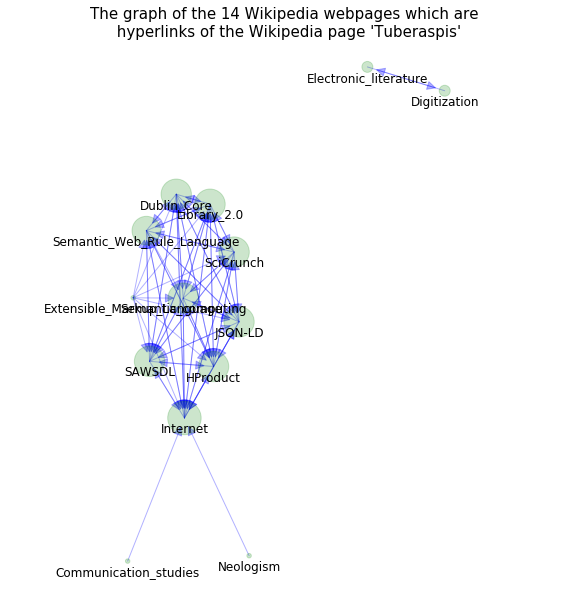

In [10]:
G=nx.DiGraph()
G.add_edges_from(eds)
print("The randomly sampled Wikipedia graph of '%s' has %i nodes (pages) and %i edges (hyperlinks)" %(page_title,len(G.nodes()),len(G.edges())))

pos=graphviz_layout(G)

plt.figure(figsize=(10,10));
nsi=[20+100*G.in_degree(n) for n in G.nodes()]
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", node_size=nsi, alpha=0.2)
nx.draw_networkx_edges(G, pos,arrowsize=20, edge_color="b", alpha=0.3)
# nx.draw_networkx_labels(G, pos)
plt.axis('off');
yoffset = {}
y_off = -5 # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset,font_size=12);
sst="The graph of the %i Wikipedia webpages which are \n hyperlinks of the Wikipedia page '%s'" %(len(G.nodes()),page_title)
plt.title(sst,fontsize=15);
plt.margins(x=0.3, y=0) 

In [11]:
# # print(pos['Geographic_coordinate_system'])
# pos['Geographic_coordinate_system']=(257.87, 82)
# # print(pos['Princess_Astrid_Coast'])
# pos['Princess_Astrid_Coast']=(266.2, 100)
# # print(pos["Hoel_Mountains"])
# pos["Hoel_Mountains"]=(248.52, 148)
# # print(pos["German_language"])=(139.79, 185)
# pos["German_language"]=(139.79, 185)

# plt.figure(figsize=(10,10));
# nsi=[100*G.in_degree(n) for n in G.nodes()]
# nodes = nx.draw_networkx_nodes(G, pos, node_color="g", node_size=nsi, alpha=0.2)
# nx.draw_networkx_edges(G, pos,arrowsize=20, edge_color="b", alpha=0.7)
# nx.draw_networkx_labels(G, pos)
# plt.axis('off');
# yoffset = {}
# y_off = -5 # offset on the y axis
# for k, v in pos.items():
#     yoffset[k] = (v[0], v[1]+y_off)
# nx.draw_networkx_labels(G, yoffset,font_size=12);
# sst="The graph of the %i Wikipedia webpages which are \n hyperlinks of the Wikipedia page '%s'" %(len(G.nodes()),page_title)
# plt.title(sst,fontsize=15);
# plt.margins(x=0.3, y=0) 

### Topic Modeling of Summaries of Wikipedia Pages

In [12]:
wiki_wiki = wikipediaapi.Wikipedia('en')
docs_d={}
for q in p:
#     summary=wikipedia.summary(q.replace("_"," "))
#     docs_d[q]=summary
    page_py = wiki_wiki.page(q)
    docs_d[q]=page_py.summary

for q in p:
    for k,v in docs_d.items():
        if k==q:
            print("%s Summary: \n %s" %(k,v))
            print(" ")

1999_Kazakh_legislative_election Summary: 
 Legislative elections were held in Kazakhstan on 10 October 1999, with a second round on 24 October. The result was a victory for the new Otan party, which won 23 of the 77 seats. Voter turnout was 62.5%.
 
1999_Kazakh_presidential_election Summary: 
 Presidential elections were held in Kazakhstan on 10 January 1999. Incumbent president Nursultan Nazarbayev won the election with over 80% of the vote, and was sworn into office on 20 January 1999. Most observers viewed the election as blatantly unfair, further confirming that Nazarbayev was not interested in promoting a democratic system of government. Voter turnout was reported to be 87.0%.
 
Alma-Ata Summary: 
 Almaty (; Kazakh: Алматы; [ɑlmɑˈtə]; Russian: Алматы, [ɐlmɐˈtɨ]), formerly known as Alma-Ata and Verniy, is the largest city in Kazakhstan, with a population of about 2,000,000 people, about 11% of the country's total population, and more than 2.7 million in its built-up area that enco

In [13]:
stop_words = stopwords.words('english') #+ list(punctuation) 

def tokenize(text):
    words = word_tokenize(text)
    words = [w.lower() for w in words]
    return [w for w in words if w not in stop_words and not w.isdigit()] 

In [14]:
vocabulary = set()
docs=list(docs_d.values())
for i in docs:
    words = tokenize(i)
    vocabulary.update(words)
 
vocabulary = list(vocabulary)
word_index = {w: idx for idx, w in enumerate(vocabulary)}
 
VOCABULARY_SIZE = len(vocabulary)
DOCUMENTS_COUNT = len(docs)
 
print(VOCABULARY_SIZE, DOCUMENTS_COUNT)

937 16


In [15]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
#             result.append(token)
            result.append(lemmatize_stemming(token))
    return result

In [16]:
excl=[u'ere',u'ye',u'wouldn',u'madam',u'happened']
# processed_docs = ppdocs #[preprocess(doc) for doc in documents]
processed_docs = [preprocess(doc) for doc in docs]
processed_docs1=[]
for x in processed_docs:
    y=[]
    for xx in x:
        if xx not in excl:
            y.append(xx)
    processed_docs1.append(y)
processed_docs=processed_docs1
allw=[]
for x in processed_docs:
    for xx in x:
        if xx not in allw:
            allw.append(xx)
print(len(allw)) #All 5752
# processed_docs[:10]

692


In [17]:
allws=[]
for z in processed_docs:
    for zz in z:
        allws.append(zz)
print(len(allws),len(set(allws)))
# sorted(allws)
allwd=Counter(allws)
print(len(allwd))
# for p,q in allwd.items():
#     print(p,q)
# count = 0
# for k in sorted(allwd.keys()):
#     print(k)
#     count += 1
#     if count > 50:
#         break

1534 692
692


In [18]:
dictionary = gensim.corpora.Dictionary(processed_docs)
print(len(dictionary)) #All 32368
# count = 0
# for k, v in dictionary.iteritems():
#     print(k, v)
#     count += 1
#     if count > 10:
#         break

692


In [19]:
dictionary.filter_extremes(no_below=3, no_above=0.8, keep_n=300)
len(dictionary) 

76

In [20]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
# bow_corpus[43]

In [21]:
nt=4 #number_of_topics
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=nt, id2word=dictionary, passes=2, workers=2)

In [22]:
topics = lda_model.print_topics(num_words=25) #350

terms=[]
lt=[]
for i in range(nt):
    for t in topics: 
        lt.append(t[1].split(" + "))
for s in lt:
    for ss in s:
        terms.append(ss[6:])
#         if re.sub(r'[^a-zA-Z]','', ss) not in terms:
#             terms.append(re.sub(r'[^a-zA-Z]','', ss))
terms=[t.replace('"',"") for t in terms]
terms=sorted(set(terms))
print(len(terms))
print(" ")
print("LIST OF TM TERMS:")
print(" ")
for i in terms:
    print(i)

58
 
LIST OF TM TERMS:
 
alma
almati
area
asia
astana
border
capit
central
citi
communist
council
countri
creativ
declar
elect
europ
govern
health
hold
human
includ
independ
intern
kazakh
know
kyrgyzstan
largest
later
major
march
member
nation
nazarbayev
network
north
nursultan
octob
offici
oper
parti
peopl
popul
power
presid
primari
republ
right
rule
russian
secur
serv
socialist
southern
soviet
time
union
unit
world


In [23]:
sss=[]
for idx, topic in lda_model.print_topics(-1):
    tt=[]
    s=topic.split(" + ")
    ss=[]
    uu=[]
    for t in s:
        u0=float(t.split("*")[0])
        u1=t.split("*")[1].replace('"','')
        if (u1,u0) not in ss:
            ss.append((u1,u0))
        if t not in uu:
            uu.append(t) 
    sss.append(ss)
    topic=" + ".join(uu).encode('utf-8')
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: b'0.073*"soviet" + 0.069*"kazakh" + 0.058*"republ" + 0.032*"russian" + 0.031*"independ" + 0.029*"union" + 0.026*"nazarbayev" + 0.022*"nation" + 0.020*"socialist" + 0.020*"presid"'
Topic: 1 
Words: b'0.087*"kazakh" + 0.046*"soviet" + 0.040*"republ" + 0.038*"russian" + 0.035*"union" + 0.034*"presid" + 0.033*"nazarbayev" + 0.031*"govern" + 0.026*"elect" + 0.025*"countri"'
Topic: 2 
Words: b'0.102*"soviet" + 0.050*"union" + 0.046*"world" + 0.038*"europ" + 0.037*"power" + 0.032*"parti" + 0.032*"republ" + 0.031*"russian" + 0.031*"communist" + 0.028*"largest"'
Topic: 3 
Words: b'0.090*"citi" + 0.043*"popul" + 0.043*"area" + 0.036*"kazakh" + 0.031*"alma" + 0.031*"health" + 0.031*"capit" + 0.030*"almati" + 0.030*"countri" + 0.029*"parti"'


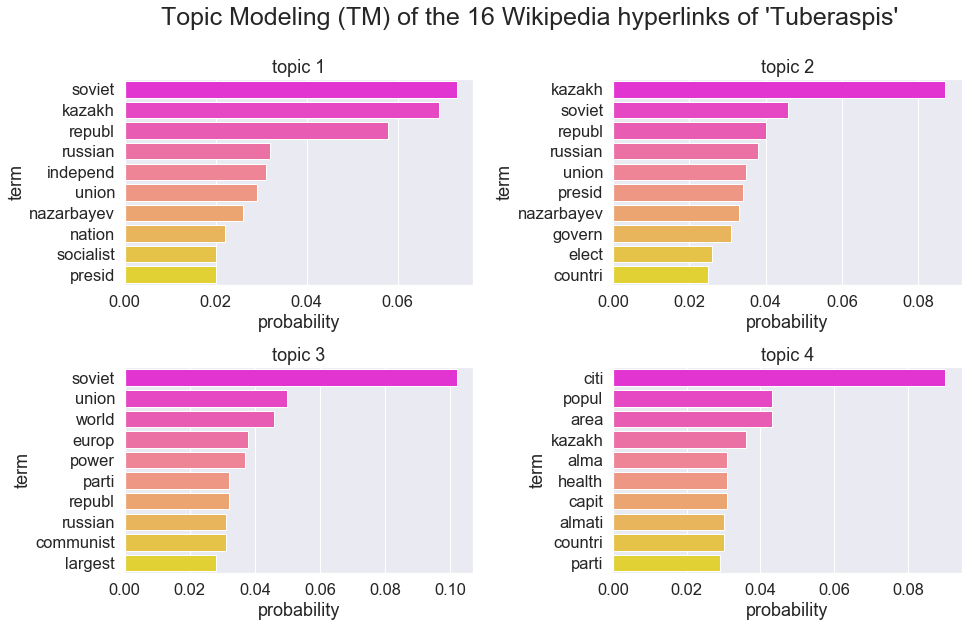

In [24]:
fig=plt.figure(figsize=(15,25)) #figsize=(15,2.4*15*((nt+1)/4))); #15
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(nt):
    sns.set(font_scale = 1.5)
    df=pd.DataFrame(sss[i], columns=['term','prob']).set_index('term')
#     plt.subplot(nt+1,2,i+1); #5
    ax = fig.add_subplot(nt+1,2,i+1)
    plt.title('topic '+str(i+1));
    sns.barplot(x='prob', y=df.index, data=df, label='Cities', palette='spring');
    plt.xlabel('probability');
ss1="%i Wikipedia hyperlinks of '%s'" %(len(p),page_title)
sst="Topic Modeling (TM) of the %s" %ss1
plt.suptitle(sst,fontsize=25, y=0.92);
plt.show()

In [25]:
from pyLDAvis import gensim as pgensim
vis = pgensim.prepare(lda_model,bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.006471  0.019228       1        1  30.028429
1     -0.064843  0.046931       2        1  29.705170
3      0.142566 -0.011693       3        1  20.541368
2     -0.084194 -0.054466       4        1  19.725031, topic_info=         Term       Freq      Total Category  logprob  loglift
15       citi  13.000000  13.000000  Default  30.0000  30.0000
44     soviet  31.000000  31.000000  Default  29.0000  29.0000
23     kazakh  29.000000  29.000000  Default  28.0000  28.0000
74      world   9.000000   9.000000  Default  27.0000  27.0000
36      popul   8.000000   8.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
39     republ   3.372622  20.908976   Topic4  -3.4544  -0.2012
16    countri   1.879714  12.258519   Topic4  -4.0390  -0.2518
42  socialist   1.349932   7.814465   Topic4  -4.3701  -0.1326
69      human   1.150768   7.451392   Topic4  -4.5297  -0.2447
20     health   0.977758   5.743844   Topic4  -4.6926  -0.1473

[181 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
66        1  0.287801  accus
66        2  0.287801  accus
66        4  0.287801  accus
9         1  0.276483   alma
9         2  0.138242   alma
...     ...       ...    ...
74        2  0.207383  world
74        4  0.518458  world
63        1  0.290679   year
63        2  0.581359   year
63        4  0.290679   year

[233 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3])

### The Graph of Sententially Co-Occurrent TM Terms

In [26]:
terms

['alma',
 'almati',
 'area',
 'asia',
 'astana',
 'border',
 'capit',
 'central',
 'citi',
 'communist',
 'council',
 'countri',
 'creativ',
 'declar',
 'elect',
 'europ',
 'govern',
 'health',
 'hold',
 'human',
 'includ',
 'independ',
 'intern',
 'kazakh',
 'know',
 'kyrgyzstan',
 'largest',
 'later',
 'major',
 'march',
 'member',
 'nation',
 'nazarbayev',
 'network',
 'north',
 'nursultan',
 'octob',
 'offici',
 'oper',
 'parti',
 'peopl',
 'popul',
 'power',
 'presid',
 'primari',
 'republ',
 'right',
 'rule',
 'russian',
 'secur',
 'serv',
 'socialist',
 'southern',
 'soviet',
 'time',
 'union',
 'unit',
 'world']

In [27]:
pre=[]
for i in range(len(terms)):
    start=terms[i][:4]
    pre.append(start)
for j,k in Counter(pre).items():
    if k>1:
        print(j)

alma
coun


In [28]:
# Without aliases

alias_dict={}

for n in terms:
    alias_dict[n]=n

In [29]:
# # With aliases

# alias_dict={}

# Without aliases

# for n in terms:
#     if n=="champion":
#         alias_dict[n]="champion"
#     elif n=="championship":
#         alias_dict[n]="champion"
#     elif n=="competit":
#         alias_dict[n]="competit"
#     elif n=="compet":
#         alias_dict[n]="competit"
#     if n=="anxiety":
#         alias_dict[n]="anxiety"
#     elif n=="anxious":
#         alias_dict[n]="anxiety"
#     if n=="fall":
#         alias_dict[n]="fall"
#     elif n=="fallen":
#         alias_dict[n]="falling"
#     elif n=="falling":
#         alias_dict[n]="falling"
#     elif n=="laugh":
#         alias_dict[n]="laugh"
#     elif n=="laughed":
#         alias_dict[n]="laugh"
#     elif n=="spirit":
#         alias_dict[n]="spirit"
#     elif n=="spirits":
#         alias_dict[n]="spirit"
#     elif n=="tells":
#         alias_dict[n]="telling"
#     elif n=="telling":
#         alias_dict[n]="telling"
#     elif n=="wished":
#         alias_dict[n]="wishes"
#     elif n=="wishes":
#         alias_dict[n]="wishes"
#     else:
#         alias_dict[n]=n
# print("The dictionary of aliases has %i keys (terms) and %i unique values (aliased terms)" %(len(alias_dict.keys()),len(set(alias_dict.values()))))
# for k,v in alias_dict.items():
#     print(k,"-->",v)

In [30]:
tdocs=" ".join(docs)
blob = TextBlob(tdocs)
textSentences = blob.sentences
sendic=dict()
for i,v in enumerate(textSentences):
    sent=v.sentiment.polarity
    wl=[]
    for term in list(set(alias_dict.values())):
        if term in v: 
            wl.append(term)
    if len(wl)>1:
        sendic[i]=wl 
medges=[]
for k,v in sendic.items():
    sent=textSentences[k].sentiment.polarity
    dd={}
    ps=set()
    for j in itertools.combinations(v, 2):
        ps.add(j)
        dd[j]=(k,sent)
    for jj in ps:
        s=0
        ss=0
        for kk,vv in dd.items():
            if kk==jj:
                s+=1
                ss+=vv[1]
        if alias_dict[jj[0]]!=alias_dict[jj[1]]:
            medges.append((alias_dict[jj[0]],alias_dict[jj[1]],"Sentence_"+str(k),ss/float(s)))
print("The %s contain %i sentential co-occurrences among %i TM terms"%(ss1,len(medges),len(set(alias_dict.values()))))
medges

The 16 Wikipedia hyperlinks of 'Tuberaspis' contain 193 sentential co-occurrences among 58 TM terms


[('elect', 'presid', 'Sentence_4', 0.0),
 ('elect', 'govern', 'Sentence_5', -0.03125),
 ('elect', 'serv', 'Sentence_5', -0.03125),
 ('serv', 'govern', 'Sentence_5', -0.03125),
 ('peopl', 'know', 'Sentence_7', 0.14583333333333334),
 ('peopl', 'largest', 'Sentence_7', 0.14583333333333334),
 ('know', 'popul', 'Sentence_7', 0.14583333333333334),
 ('largest', 'popul', 'Sentence_7', 0.14583333333333334),
 ('largest', 'know', 'Sentence_7', 0.14583333333333334),
 ('peopl', 'area', 'Sentence_7', 0.14583333333333334),
 ('area', 'know', 'Sentence_7', 0.14583333333333334),
 ('area', 'popul', 'Sentence_7', 0.14583333333333334),
 ('peopl', 'popul', 'Sentence_7', 0.14583333333333334),
 ('largest', 'area', 'Sentence_7', 0.14583333333333334),
 ('independ', 'serv', 'Sentence_8', 0.0),
 ('capit', 'later', 'Sentence_8', 0.0),
 ('later', 'serv', 'Sentence_8', 0.0),
 ('capit', 'serv', 'Sentence_8', 0.0),
 ('later', 'independ', 'Sentence_8', 0.0),
 ('capit', 'independ', 'Sentence_8', 0.0),
 ('north', 'govern

In [31]:
medgesd=[]
for e in medges:
    d={}
    d['Sentence']=e[2]
    d['Average sentiment']=e[3]
    medgesd.append((e[0],e[1],d))
    
G = nx.MultiGraph()
G.add_edges_from(medgesd)
for e in G.edges(data=True):
    if e[0]==e[1]:
        G.remove_edge(e[0],e[1])
weight={(x,y):v for (x, y), v in Counter(G.edges()).items()}
w_edges=[(x,y,z) for (x,y),z in weight.items()]
Gw = nx.Graph()
Gw.add_weighted_edges_from(w_edges)

titlename=ss1
print("The graph of sententially co-occurrent TM terms in the %s is a weighted graph and \n it has %i nodes and %i edges \n" %(titlename,len(Gw.nodes()),len(Gw.edges())))
out=' '.join([n+"\n" for n in alias_dict.values() if n not in Gw.nodes()])
print("The terms which do not co-occur in sentences are: \n %s" %out)
# print "Graph Gw is a weighted graph with %i nodes and %i edges" %(len(Gw.nodes()),len(Gw.edges()))
print("The density of this graph is %.3f" %nx.density(Gw))
if nx.is_connected(Gw)==True:
    print ("This graph is a connected graph")
else:
    print ("This graph is a disconnected graph and it has",nx.number_connected_components(Gw),"connected components" )   
    giant = max(connected_component_subgraphs(Gw), key=len)
    Gwlcc=Gw.subgraph(giant)
    print ("The largest connected component of this graph is a weighted graph with %i nodes and %i edges" %(len(Gwlcc.nodes()),len(Gwlcc.edges())))
    print ("The density of the largest connected component of this graph is %.3f" %nx.density(Gwlcc))

The graph of sententially co-occurrent TM terms in the 16 Wikipedia hyperlinks of 'Tuberaspis' is a weighted graph and 
 it has 42 nodes and 134 edges 

The terms which do not co-occur in sentences are: 
 alma
 almati
 astana
 council
 countri
 creativ
 europ
 hold
 kazakh
 kyrgyzstan
 march
 nazarbayev
 nursultan
 octob
 secur
 soviet

The density of this graph is 0.156
This graph is a connected graph


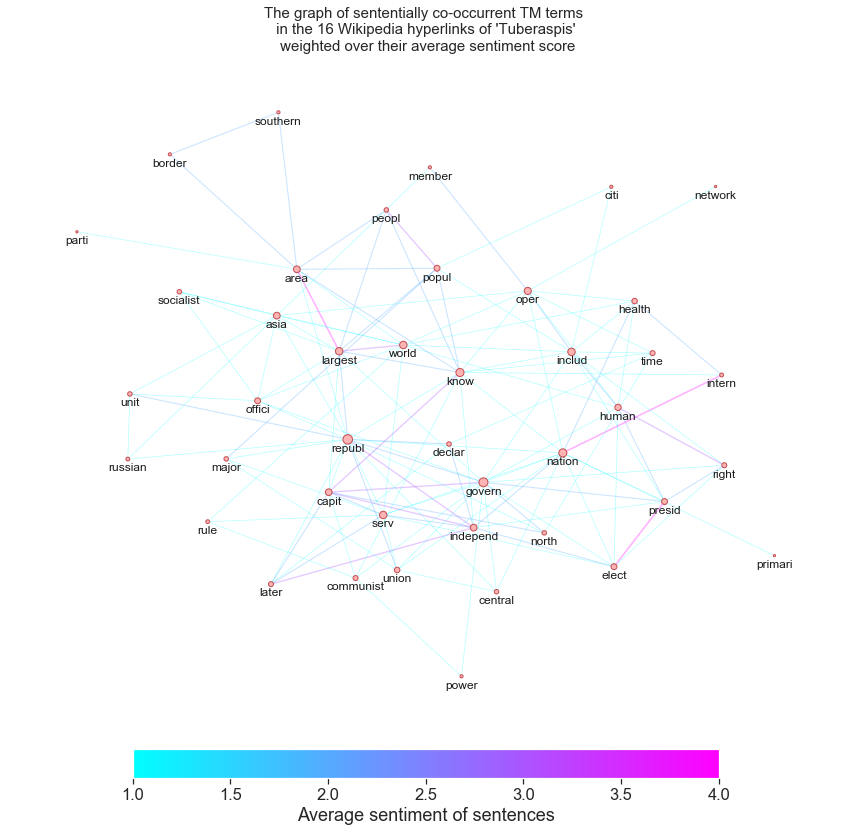

In [32]:
edge_width=[Gw[u][v]['weight'] for u,v in Gw.edges()]
edge_width=[math.log(1+w) for w in edge_width]
cmap=plt.cm.cool
weight_list = [ e[2]['weight'] for e in Gw.edges(data=True) ]
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
# width_list=[2*math.log(2+w) for w in weight_list]
width_list=[1.5*math.log(abs(min(weight_list))+2+w) for w in weight_list] #weight_list
nsi=[5*Gw.degree(n) for n in Gw.nodes()]

figsize=(15,15)

pos=graphviz_layout(Gw) 

node_color="#ffb3b3"
node_border_color="r"
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(Gw, pos, node_color=node_color,node_size=nsi)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(Gw, pos, edge_color=edge_color,edge_cmap=cmap,vmin=vmin, vmax=vmax,width=edge_width,alpha=0.3)
plt.axis('off');
yoffset = {}
y_off = -5 # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(Gw, yoffset,font_size=12);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='horizontal', shrink=0.7, pad = 0.02)
cbar.set_label('Average sentiment of sentences')
sst="The graph of sententially co-occurrent TM terms \n in the %s \n weighted over their average sentiment score" %titlename
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

In [33]:
# pos['Samuel F. Billington']=(382.22, 550)
# pos['Amsterdam']=(398.54, 522)
# pos['Switzerland']=(200, 507.22)
# pos['Peter Hawkins']=(321.72, 514)
# pos['Danube']=(290, 390)
# pos['Windham']=(358.32, 270)
# pos['Mile']=(230.97, 350)
# pos['Black Sea']=(290.5, 420)
# pos['Bosphorus']=(361.57, 540)
# pos['Yorkshire']=(347.89, 500)

# node_color="#ffb3b3"
# node_border_color="r"
# plt.figure(figsize=figsize);
# nodes = nx.draw_networkx_nodes(Gw, pos, node_color=node_color,node_size=nsi)
# nodes.set_edgecolor(node_border_color)
# nx.draw_networkx_edges(Gw, pos, edge_color=edge_color,edge_cmap=cmap,vmin=vmin, vmax=vmax,width=edge_width,alpha=0.3)
# plt.axis('off');
# yoffset = {}
# y_off = -5 # offset on the y axis
# for k, v in pos.items():
#     yoffset[k] = (v[0], v[1]+y_off)
# nx.draw_networkx_labels(Gw, yoffset,font_size=12);
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# sm.set_array([])
# cbar = plt.colorbar(sm, orientation='horizontal', shrink=0.7, pad = 0.02)
# cbar.set_label('Average sentiment of sentences')
# sst="The graph of sententially co-occurrent TM terms \n in the %s \n weighted over their average sentiment score" %titlename
# plt.title(sst,fontsize=15);
# plt.margins(x=0.1, y=0.1) 